<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/m3_mp3_nb_credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project 03 : Credit Card Default Risk Analysis

## Learning Objectives

At the end of the mini project, you will be able to

* understand the application of machine learning in finacial sector
* use a real world dataset.
* compare between different types of classification methods and their pros and cons.

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing



### Dataset Description

The dataset chosen for this mini project is [default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) with 30000 instances each having 24 attributes.



In [ ]:
# Import the libraries used for machine learning
import numpy as np
import pandas as pd
import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option

import ydata_profiling

#!pip install pandas-profiling

from pandas_profiling import ProfileReport
plt.style.use('ggplot')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import os

In [ ]:
#@title Download Dataset
!wget https://cdn.extras.talentsprint.com/ADSMI/Datasets/default_of_credit_card_clients.zip
!unzip "default_of_credit_card_clients.zip"

--2023-04-16 07:26:53--  https://cdn.extras.talentsprint.com/ADSMI/Datasets/default_of_credit_card_clients.zip
Resolving cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)... 172.105.52.210
Connecting to cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 993810 (971K) [application/zip]
Saving to: ‘default_of_credit_card_clients.zip’

default_of_credit_c 100%[===================>] 970.52K   772KB/s    in 1.3s    

2023-04-16 07:26:55 (772 KB/s) - ‘default_of_credit_card_clients.zip’ saved [993810/993810]

Archive:  default_of_credit_card_clients.zip
  inflating: default_of_credit_card_clients.csv  


### **Exercise 1**: Load the data show the top few rows of the dataframe.  (1 point)

In [ ]:
data = pd.read_csv('default_of_credit_card_clients.csv', skiprows=[0])

data.shape

(30000, 25)

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### **Exercise 2**: Perform the following

- Exploratory Data Analysis (2 points)
- Preprocessing (1 point)

## Exploratory data analysis

there are total 23 explanatory variables and one response variable. Some variable need to be converted to categories. such as.

* __Gender(X2)__
1 = Male, 2 = Female

* __EDUCATION(X3)__
1 = graduate school; 2 = university; 3 = high school; 4 = others
* __Marital status(X4)__
1 = married; 2 = single; 3 = others
* __Repayment status(X6-X11)__
   -2= no consumption, -1= pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ...,8 = payment delay for eight months,9 = payment delay for nine months and above

   these variables should be converted to categorical variable


In [ ]:
# drop column "ID"
data.drop(['ID'], axis=1, inplace=True)

### Statistics
The detail statistics of the dataset of various columns of dataset

In [ ]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Print Summary of the dataset
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
# male, female counts
print("Male Count:",data['SEX'].value_counts()[1])
print("Female Count:",data['SEX'].value_counts()[2])


Male Count: 11888
Female Count: 18112


In [ ]:
df2 = data.groupby(['SEX'])['SEX'].count()
print(df2)

SEX
1    11888
2    18112
Name: SEX, dtype: int64


In [ ]:
#Education categories
#EDUCATION(X3) 1 = graduate school; 2 = university; 3 = high school; 4 = others

print("Graduate School:",data['EDUCATION'].value_counts()[1])
print("university:",data['EDUCATION'].value_counts()[2])
print("high school:",data['EDUCATION'].value_counts()[3])
print("others:",data['EDUCATION'].value_counts()[4])

Graduate School: 10585
university: 14030
high school: 4917
others: 123


In [ ]:
# Marriage catagories
#Marital status(X4) 1 = married; 2 = single; 3 = others
print("Married:",data['X4'].value_counts()['1'])
print("Single:",data['X4'].value_counts()['2'])
print("others:",data['X4'].value_counts()['3'])
#print("others:",data['X3'].value_counts()['4'])
# YOUR CODE HERE

Married: 13659
Single: 15964
others: 323


### Visualization

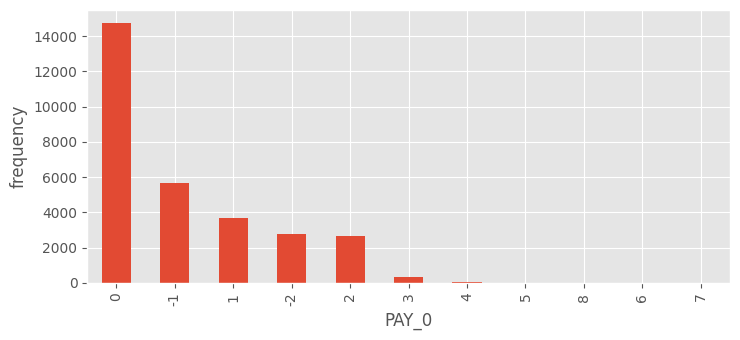

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

data['PAY_0'].value_counts().plot(ax=ax, kind='bar', xlabel='PAY_0', ylabel='frequency')

plt.show()

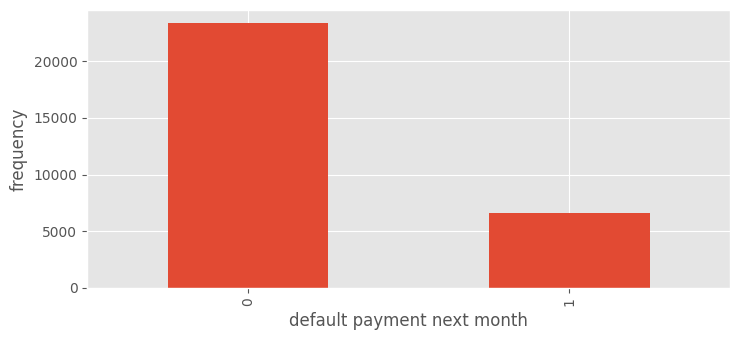

In [ ]:
# plot the frequency of defaults
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

data['default payment next month'].value_counts().plot(ax=ax, kind='bar', xlabel='default payment next month', ylabel='frequency')

plt.show()

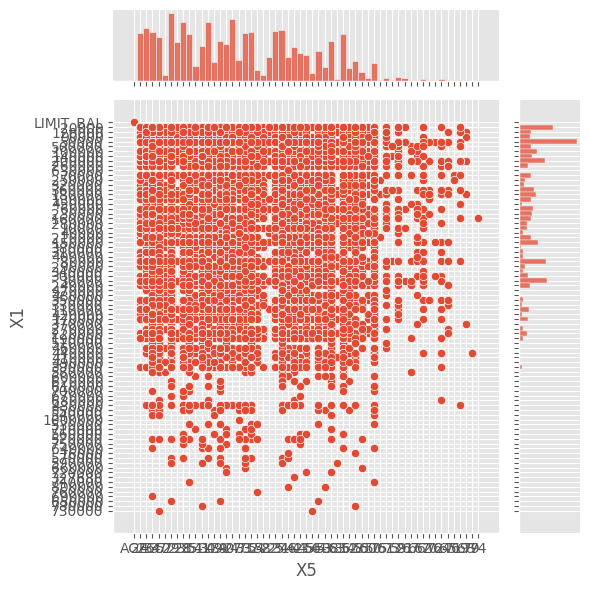

In [ ]:
sns.jointplot(data, x="X5", y="X1")

<Axes: xlabel='AGE', ylabel='LIMIT_BAL'>

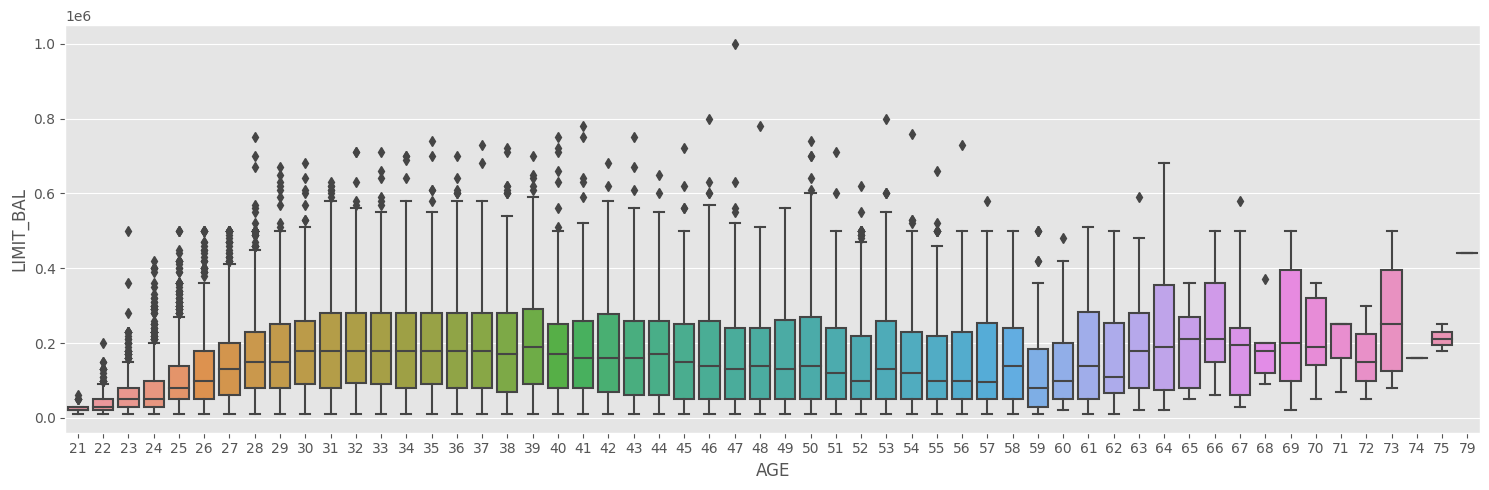

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data, x="AGE", y="LIMIT_BAL", ax=ax)

<Axes: xlabel='MARRIAGE', ylabel='AGE'>

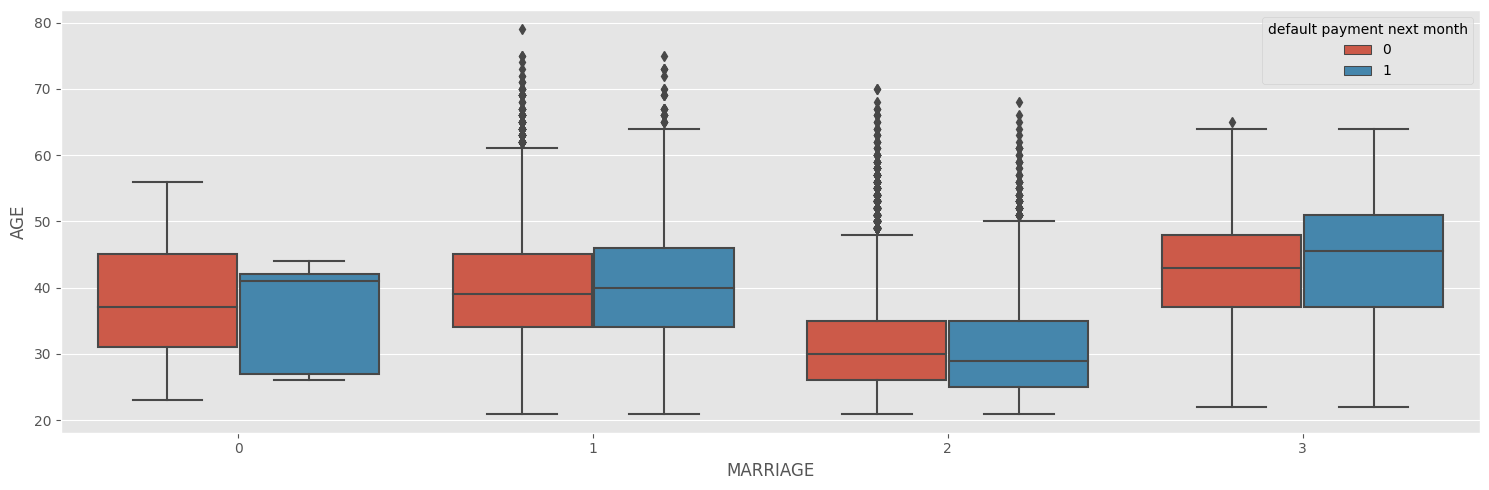

In [ ]:
#Plot the defaulter(Y), marriage(X4) vs age(X5) use seborn library
                                          
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data, x="MARRIAGE", y="AGE", hue="default payment next month", ax=ax)

<Axes: xlabel='default payment next month', ylabel='AGE'>

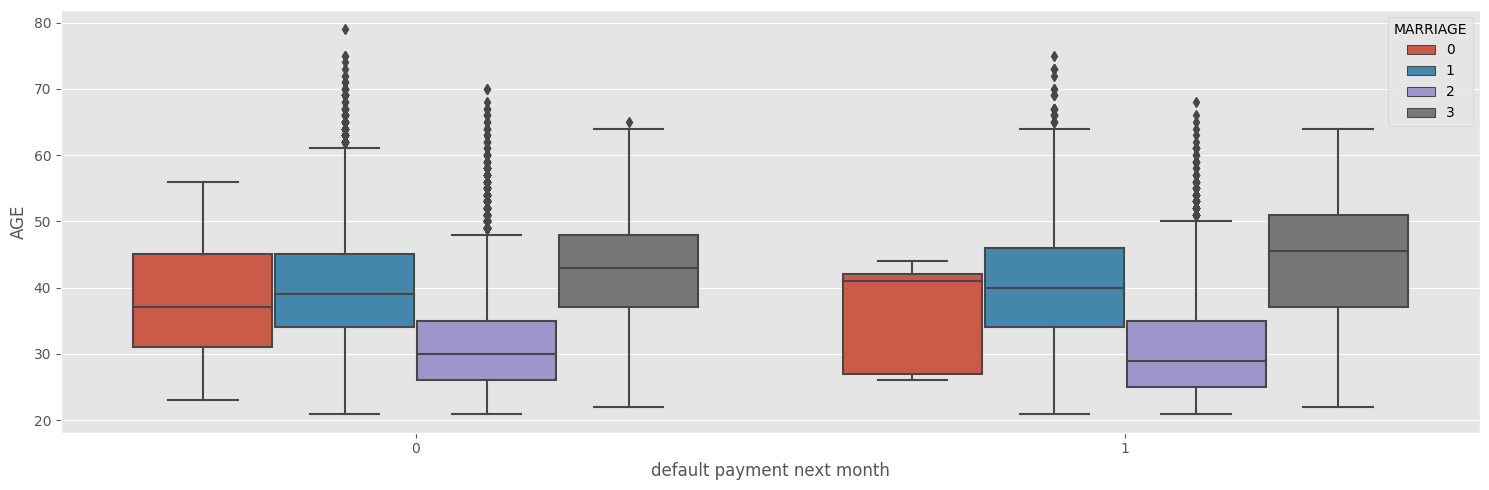

In [ ]:
#Plot the defaulter(Y), marriage(X4) vs age(X5) use seborn library
                                          
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data, x="default payment next month", y="AGE", hue="MARRIAGE", ax=ax)

<Axes: xlabel='default payment next month', ylabel='AGE'>

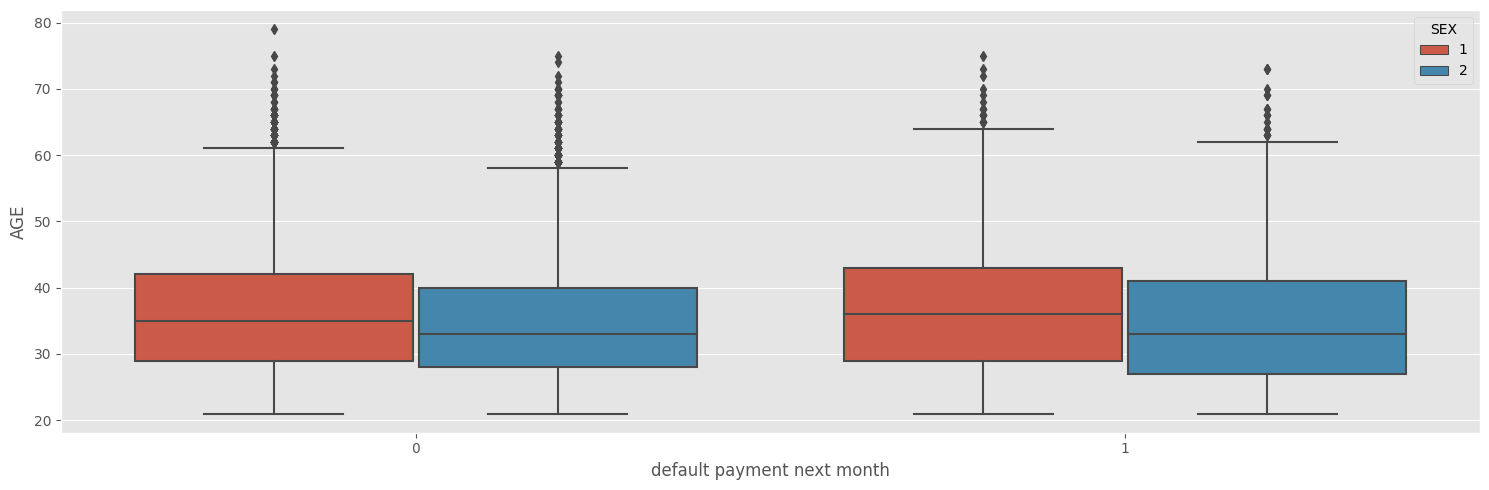

In [ ]:
# plot the defaulter(Y), sex(X2) vs age(X5)


                                          
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data, x="default payment next month", y="AGE", hue="SEX", ax=ax)

# Preprocessing

In [ ]:
# One hot encoding for columns with nominal categorical values

#defining function filter 
def filter(x):
    if x == 1:
        return 'Male'
    if x == 2:
        return 'Female'

data['SEX'] = data['SEX'].apply(filter)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.head()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_Female,SEX_Male
0,1,20000,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,1,0
1,2,120000,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,0
2,3,90000,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,1,0
3,4,50000,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,1,0
4,5,50000,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,0,1


In [ ]:
# Split the data into  X (input features) and Y (output features)
X = data.drop('default payment next month', axis = 1)

Y = data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2,random_state=32, stratify=Y)

### **Exercise 3** (4 Points)

Train the model using the 4 ML models:

- Logistic Regression
- Perceptron
- SVM
- Random Forest

## Training

Application of machine learning models, such as

### Logistic Regression
Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, more popularly called the sigmoid function was to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. 

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$\frac{1}{ (1 + e^{-value})}$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. Below is a plot of the numbers between $-5$ and $5$ transformed into the range $0$ and $1$ using the logistic function.





### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **threshold logic unit (TLU)**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>

The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &0&  if\ \  z < 0\\ 
    &1&  if\ \  z \ge 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &-1&  if\ \  z < 0\\ 
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class. 



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

### Support Vector Machines: Maximizing the Margin

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. 

### Random Forests

A random forest is a collection of decision trees whose results are aggregated into one final result. Random Forest  is a supervised classification algorithm. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. But here creating the forest is not the same as constructing the decision tree with the information gain or gain index approach.

The difference between the Random Forest algorithm and the decision tree algorithm is that in Random Forest, the process of finding the root node and splitting the feature nodes will run randomly.

In [ ]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
# Apply vaious classification machine learning algorithms
logistic_regression = LogisticRegression()

# Training the logistic regression classifier
logistic_regression.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = logistic_regression.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred_lr))

import numpy as np
from sklearn.metrics import f1_score
print(metrics.f1_score(y_test, y_pred_lr, average=None))

# F1 score calculation

0.7786666666666666
0.0


In [ ]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_svc.fit(X_train,y_train)

# Predict the model 
predict_svc = model_svc.predict(X_test)

print(predict_svc)

# Calculate the accuracy


cm_svc = confusion_matrix(y_test, predict_svc)
print(cm_svc)
accuracy_score(y_test, predict_svc)

print(classification_report(y_test, predict_svc))

### **Exercise 4**

Evaluate the models and display the results ( 2 points)

### Model Evaluation 

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1-Score

In [ ]:
# Display performance metrics and confusion matrix as infographic
# YOUR CODE HERE